# ONLINE GROCERY SHOPPING OVER OFFLINE

## IMPORTING LIBRARIES

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
%matplotlib inline

## IMPORTING & READING The DATASET

In [232]:
data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\project data.csv")

In [233]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,Are online products cheaper in price as compared to your Retailer Shop?,"Did you find product online easily ,compare to your Retailer Shop?",Do you find any difficulties in online payment ?,Are you satisfied with the product you received as compared to your Retailer Shop?,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


### DETAILS OF DATASET

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 20 columns):
 #   Column                                                                                     Non-Null Count  Dtype 
---  ------                                                                                     --------------  ----- 
 0   Timestamp                                                                                  370 non-null    object
 1   Have you ever shopped Online?                                                              370 non-null    object
 2   If Yes, Do you find Online Grocery Shopping Easier ?                                       370 non-null    object
 3   Why do you  Shop Online?                                                                   370 non-null    object
 4   Did you find good quality of product online as compare to your Retailer Shop?              370 non-null    object
 5   Do you find enough  Quantity of grocery product  online i

## NO. OF ROWS & COLUMNS IN DATASET

In [235]:
data.shape

(370, 20)

## COLUMNS NAMES

In [236]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ',
       'Did you find good quality of product online as compare to your Retailer Shop?',
       'Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ',
       'Are online  products cheaper in price as compared to your Retailer Shop? ',
       'Did you find product online easily ,compare to  your Retailer Shop? ',
       'Do you find any difficulties in online payment ?',
       'Are you satisfied with the product  you received as compared to your  Retailer Shop? ',
       'On scale of 5 , can you rate for following factor ? [On Time Delivery]',
       'On scale of 5 , can you rate for following factor ? [Trustworthy]',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]',
       'On scale of 5 , can you rate for following factor ? [Security]',
       'On scale of 5 , c

## DATATYPE OF COLUMNS

In [237]:
data.dtypes

Timestamp                                                                                    object
Have you ever shopped Online?                                                                object
If Yes, Do you find Online Grocery Shopping Easier ?                                         object
Why do you  Shop Online?                                                                     object
Did you find good quality of product online as compare to your Retailer Shop?                object
Do you find enough  Quantity of grocery product  online in comparison to your Retailer ?     object
Are online  products cheaper in price as compared to your Retailer Shop?                     object
Did you find product online easily ,compare to  your Retailer Shop?                          object
Do you find any difficulties in online payment ?                                             object
Are you satisfied with the product  you received as compared to your  Retailer Shop?         object


## CHECKING NULL VALUES

In [238]:
data.isnull().sum()

Timestamp                                                                                    0
Have you ever shopped Online?                                                                0
If Yes, Do you find Online Grocery Shopping Easier ?                                         0
Why do you  Shop Online?                                                                     0
Did you find good quality of product online as compare to your Retailer Shop?                0
Do you find enough  Quantity of grocery product  online in comparison to your Retailer ?     0
Are online  products cheaper in price as compared to your Retailer Shop?                     0
Did you find product online easily ,compare to  your Retailer Shop?                          0
Do you find any difficulties in online payment ?                                             0
Are you satisfied with the product  you received as compared to your  Retailer Shop?         0
On scale of 5 , can you rate for following factor 

## FINDING The  DUPLICATE VALUES

In [239]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
365    False
366    False
367    False
368    False
369    False
Length: 370, dtype: bool

## TOTAL COUNT

In [240]:
data.describe()

,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]","Overall, How would you rate your Online Grocery Shopping Experience"
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,3.564865,3.221622,3.667568,3.264865,3.481081,3.327027,3.524324
std,1.338348,1.285553,1.425770,1.207523,1.302871,1.316386,1.343741
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.250000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## RENAMING THE COLUMNS NAME

In [241]:
data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality',
                       'Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity',
                       'Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price',
                       'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily',
                       'Do you find any difficulties in online payment ?':'Difficulties in Online Payments',
                       'Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 
        'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience',
    'Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [242]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ', 'Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

## COUNT OF VALUES FROM EACH COLUMS

In [243]:
data['If Yes, Do you find Online Grocery Shopping Easier ?'].value_counts()

Yes    283
No      87
Name: If Yes, Do you find Online Grocery Shopping Easier ?, dtype: int64

In [244]:
data['Why do you  Shop Online?  '].value_counts()

All of above                                                            178
Discount & Offers;Shop at any time                                       43
Variety of Product;Discount & Offers;Shop at any time                    24
Discount & Offers                                                        22
Variety of Product;Discount & Offers                                     18
Variety of Product;Discount & Offers;Convenient;Shop at any time         17
Shop at any time                                                         13
Discount & Offers;Convenient                                              9
Convenient;Shop at any time                                               9
Variety of Product;Shop at any time                                       8
Discount & Offers;Convenient;Shop at any time                             8
Variety of Product;Discount & Offers;Convenient                           5
Convenient                                                                5
Variety of P

In [245]:
data['Quality'].value_counts()

Yes    265
No     105
Name: Quality, dtype: int64

In [246]:
data['Quantity'].value_counts()

Yes    264
No     106
Name: Quantity, dtype: int64

In [247]:
data[ 'Cheaper in price'].value_counts()

Yes    300
No      70
Name: Cheaper in price, dtype: int64

In [248]:
data[ 'Found Product Online Easily'].value_counts()

Yes    339
No      31
Name: Found Product Online Easily, dtype: int64

In [249]:
data['Difficulties in Online Payments'].value_counts()

No     290
Yes     80
Name: Difficulties in Online Payments, dtype: int64

In [250]:
data['Satisfaction'].value_counts()

Yes    265
No     105
Name: Satisfaction, dtype: int64

In [251]:
data['On Time Delivery'].value_counts()

5    124
4     88
3     65
2     59
1     34
Name: On Time Delivery, dtype: int64

In [252]:
data['Trustworthy'].value_counts()

4    114
3     81
5     64
2     62
1     49
Name: Trustworthy, dtype: int64

In [253]:
data['No transaction issues'].value_counts()

5    146
4     93
1     50
3     43
2     38
Name: No transaction issues, dtype: int64

In [254]:
data['Security'].value_counts()

4    101
3    100
2     71
5     66
1     32
Name: Security, dtype: int64

In [255]:
data['Product  Description'].value_counts()

5    105
4     97
3     72
2     63
1     33
Name: Product  Description, dtype: int64

In [256]:
data[ 'Product Reviews'].value_counts()

4    96
5    88
3    75
2    71
1    40
Name: Product Reviews, dtype: int64

In [257]:
data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '].value_counts()

Yes    322
No      48
Name: Has  COVID-19   increased time you spent online  grocery Shopping    ? , dtype: int64

In [258]:
data['How often do you shop online in last six month?'].value_counts()

Monthly           158
Weekly            130
Everyday           42
2 times a week     40
Name: How often do you shop online in last six month?, dtype: int64

In [259]:
data['Would You Prefer'].value_counts()

Yes    240
No     130
Name: Would You Prefer, dtype: int64

In [260]:
data[ 'Overall Experience'].value_counts()

5    114
4    102
2     62
3     55
1     37
Name: Overall Experience, dtype: int64

# Data Visualization

In [261]:
sns.set_theme(style='darkgrid')

## Analyzing how many people found Online Grocery Shopping Easier

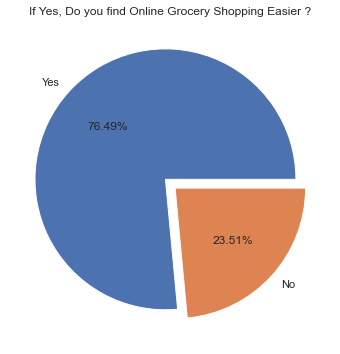

In [262]:
data['If Yes, Do you find Online Grocery Shopping Easier ?'].value_counts().plot(kind='pie',autopct='%1.2f%%',
        explode=[.05,.05],figsize=(8, 6))
plt.axis('off')
plt.title("If Yes, Do you find Online Grocery Shopping Easier ?")
plt.show()

## Analyzing why people Shop Online

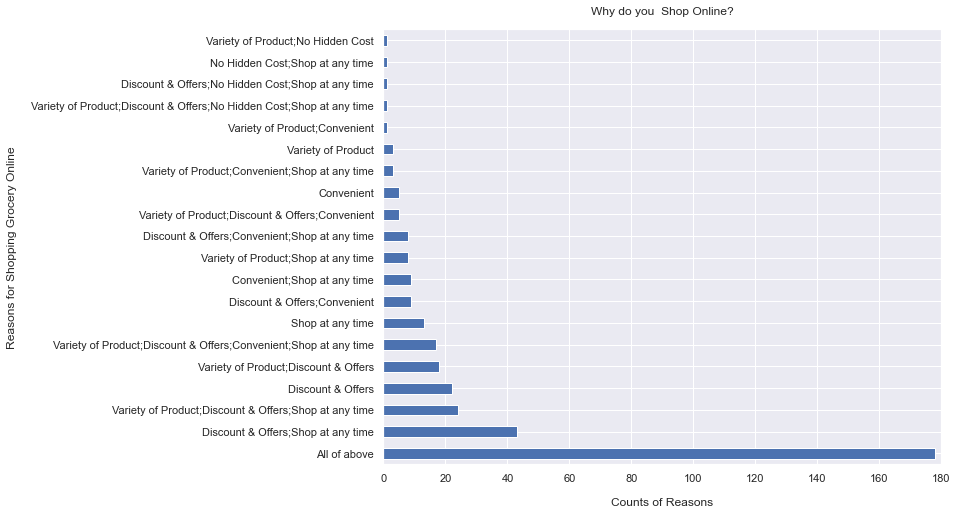

In [263]:
data[ 'Why do you  Shop Online?  '].value_counts().plot(kind='barh', figsize=(10, 8))
plt.xlabel("Counts of Reasons", labelpad=14)
plt.ylabel("Reasons for Shopping Grocery Online", labelpad=14)
plt.xlim(0, 180)
plt.title("Why do you  Shop Online?", y=1.02);

## Analyzing how often people shop online in last six month and how they rate for it


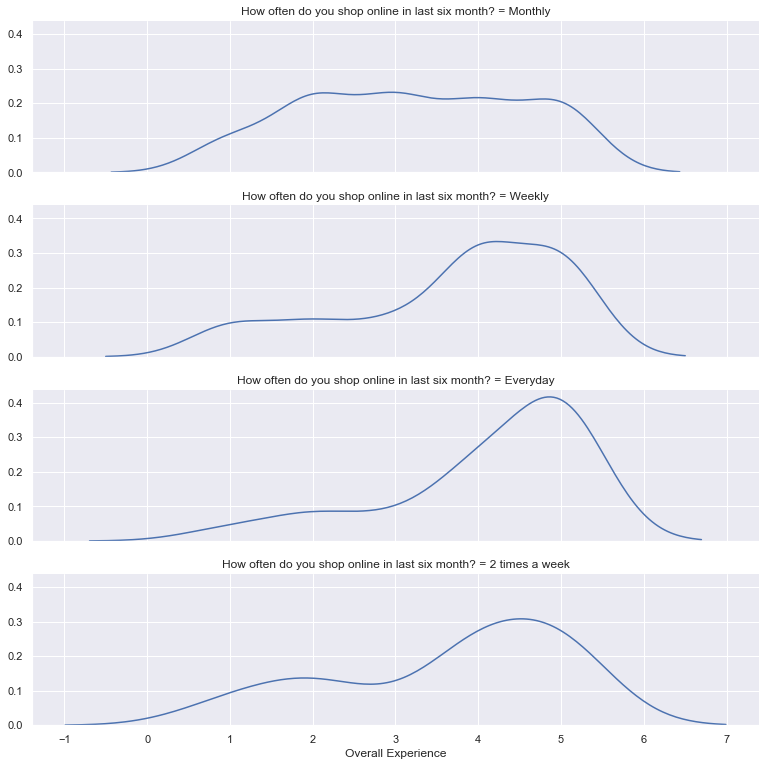

In [264]:
ordered_days = data['How often do you shop online in last six month?'].value_counts().index
g = sns.FacetGrid(data, row='How often do you shop online in last six month?', row_order=ordered_days,
                  height=2.7, aspect=4)
g.map(sns.kdeplot,'Overall Experience' )

# Analysis how much covid-19 increased people towards online shopping

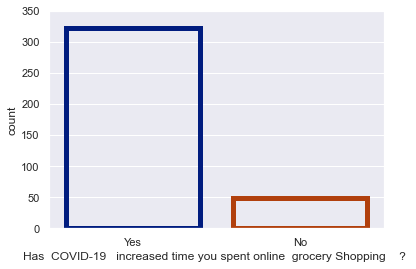

In [265]:
g = sns.countplot(x='Has  COVID-19   increased time you spent online  grocery Shopping    ? ', data=data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
g.set_ylim(0, 350) 
g=sns.set(rc={'figure.figsize':(12,10)})

# Analyzing how people found online shopping 

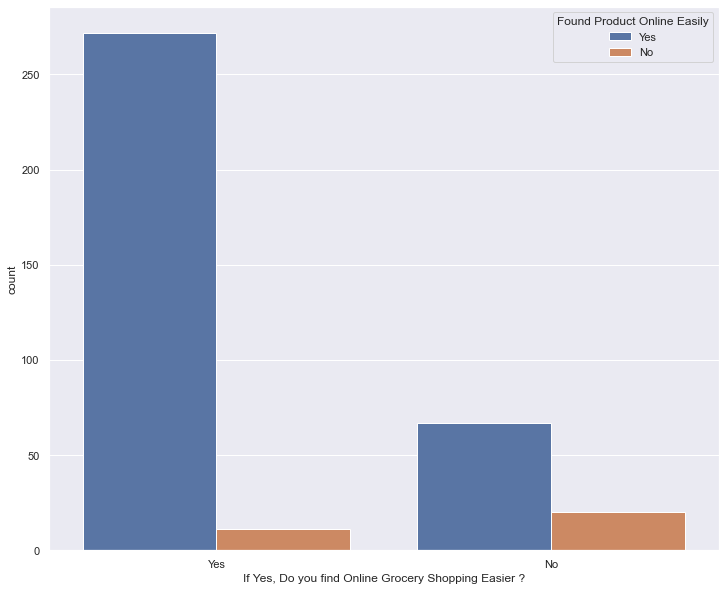

In [266]:
g = sns.countplot(x='If Yes, Do you find Online Grocery Shopping Easier ?', hue='Found Product Online Easily', data=data)

## Analyzing Overall Online Grocery Shopping Experience of peoples¶

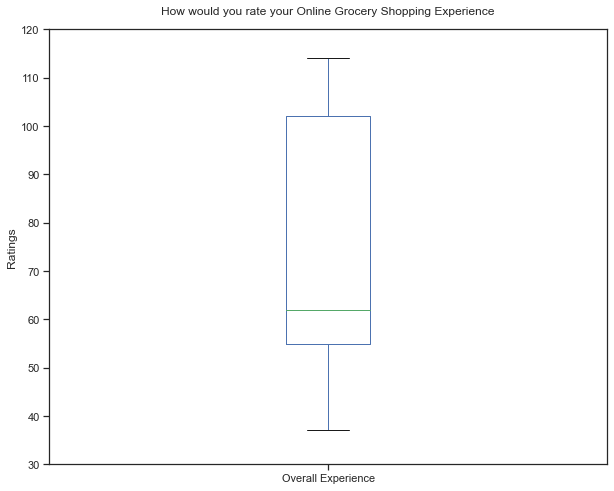

In [267]:
sns.set_theme(style='ticks')
data['Overall Experience'].value_counts().plot(kind='box', figsize=(10, 8))
plt.ylabel("Ratings")
plt.ylim(30, 120)
plt.title("How would you rate your Online Grocery Shopping Experience", y=1.02);

# Representing  quality , quantity and price  in online grocery Shopping

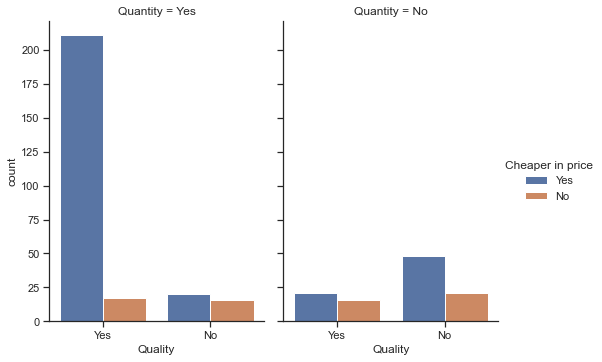

In [268]:
g = sns.catplot(x='Quality', hue='Cheaper in price', col='Quantity',
                data=data, kind="count",
                height=5, aspect=.7);

## Analyzing Had   covid-19 change the behaviour of consumer shopping

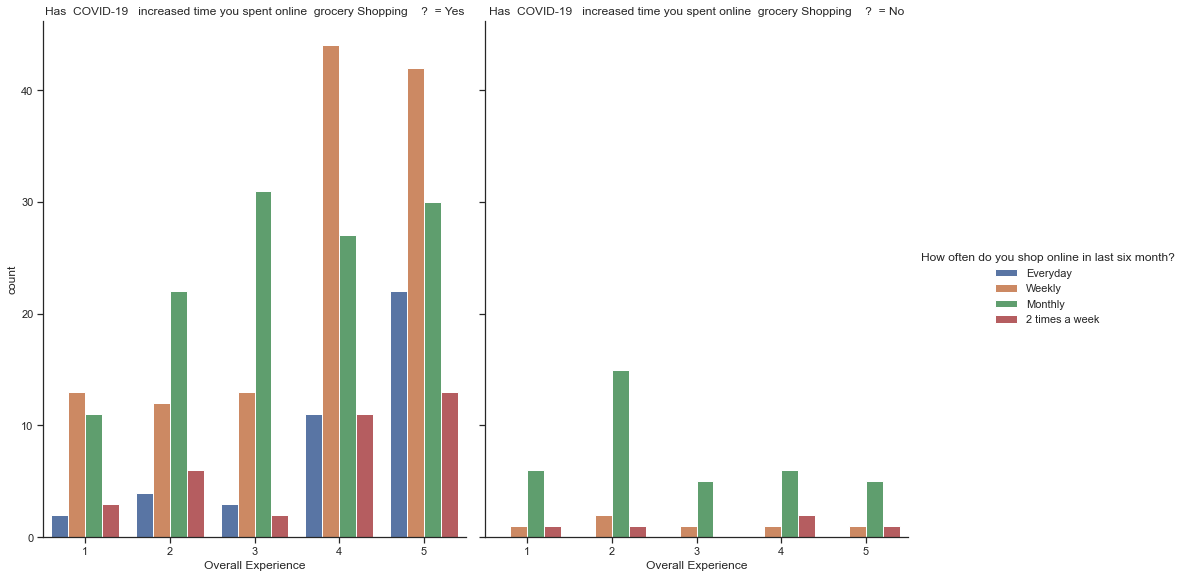

In [269]:
g = sns.catplot(x="Overall Experience", hue='How often do you shop online in last six month?', col='Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
                data=data, kind="count",
                height=8, aspect=0.8)


## Analyzing how many people are statisfied with the online grocery shopping

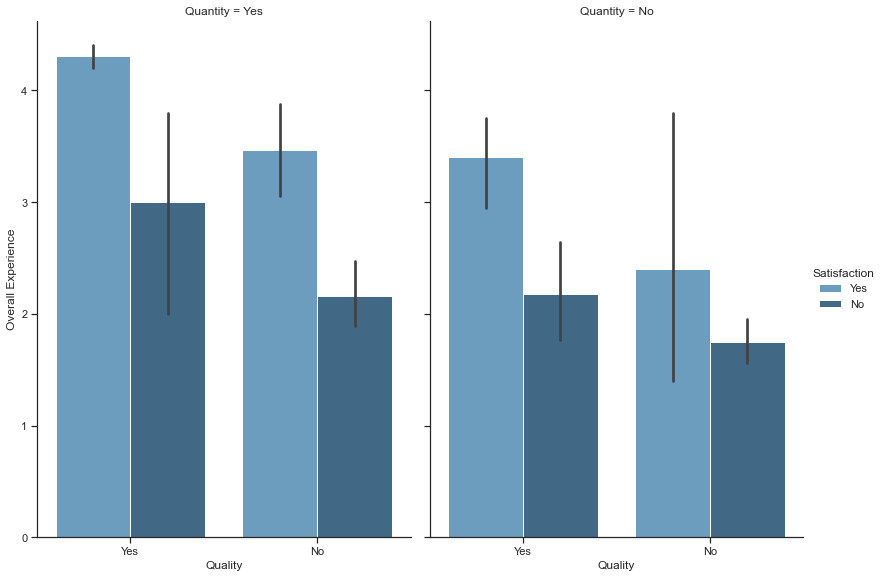

In [270]:
g = sns.catplot(x="Quality", y="Overall Experience",
                hue="Satisfaction", col="Quantity",
                data=data, kind="bar",
                height=8, aspect=.7,   palette="Blues_d");

# Analyzing how consumer evaluated the factors towards online grocery shopping

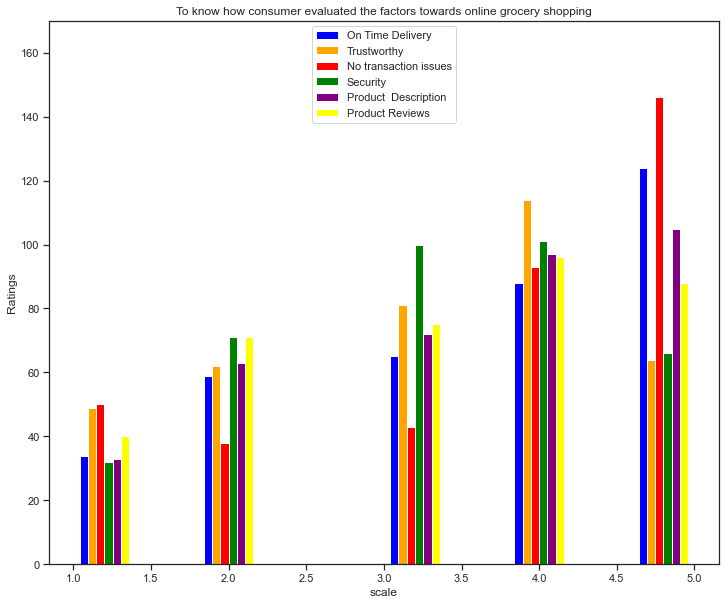

In [271]:
plt.hist([data['On Time Delivery'],data['Trustworthy'],data['No transaction issues'],data['Security'],data['Product  Description'],data['Product Reviews']], color=['blue', 'orange','red','green','purple','yellow'])
plt.title('To know how consumer evaluated the factors towards online grocery shopping')
plt.ylabel('Ratings')
plt.xlabel('scale')
plt.legend(['On Time Delivery','Trustworthy','No transaction issues','Security','Product  Description','Product Reviews'],loc=9)
plt.ylim(0, 170)
plt.show()
plt.rcParams["figure.figsize"] = (10, 8)

# To identify consumer perception towards online payment

In [272]:
diff = pd.crosstab(data['No transaction issues'],data['Difficulties in Online Payments'])

In [273]:
diff

Difficulties in Online Payments,No,Yes
No transaction issues,,
1,13,37
2,23,15
3,30,13
4,87,6
5,137,9


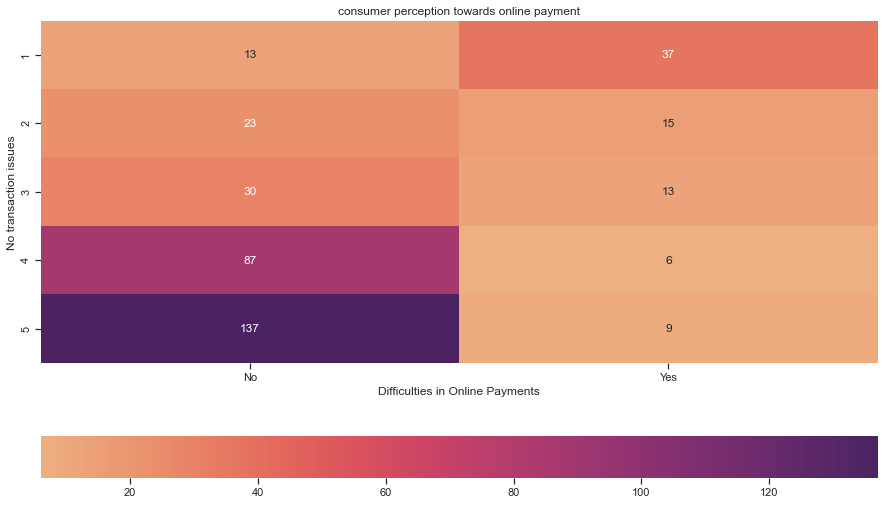

In [274]:
plt.figure(figsize=(15, 9))
plt.xlabel('Do you find any difficulties in online payment ?',)
plt.ylabel('On scale of 5 , can you rate for following factor ? [No transaction issues] ')
plt.title('consumer perception towards online payment')
sns.heatmap(diff, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

## Analyzing would people prefer to shopped Grocery online

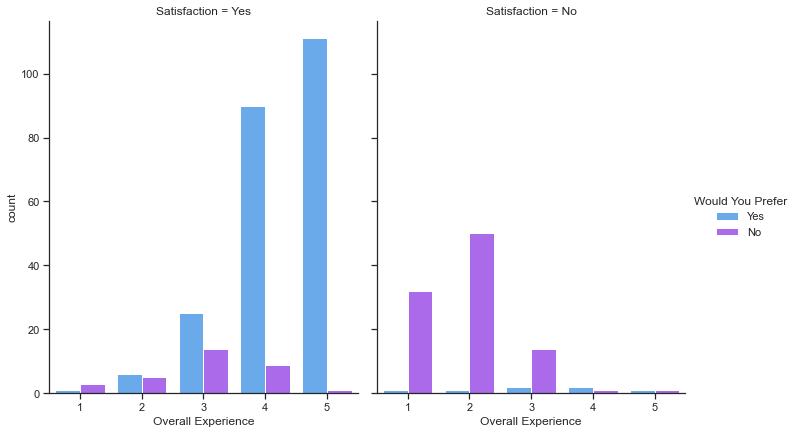

In [275]:
g = sns.catplot(x='Overall Experience', hue= 'Would You Prefer', col='Satisfaction',
                data=data, kind="count",
                height=6, aspect=0.8,palette="cool");

# Converting The Data to Integer

## Function for converting binary data

In [276]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [277]:
data['Quality'] = data['Quality'].apply(trans_con)
data['Quantity'] = data['Quantity'].apply(trans_con)


In [278]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [279]:
data['Cheaper in price'] = data['Cheaper in price'].apply(trans_con)
data['Found Product Online Easily'] = data['Found Product Online Easily'].apply(trans_con)

In [280]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [281]:
data['Difficulties in Online Payments'] = data['Difficulties in Online Payments'].apply(trans_con)
data['Satisfaction'] = data['Satisfaction'].apply(trans_con)

In [282]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,Yes,Weekly,No,1


In [283]:
data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '] = data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '].apply(trans_con)
data[ 'Would You Prefer'] = data[ 'Would You Prefer'].apply(trans_con)

In [284]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


In [285]:
data['If Yes, Do you find Online Grocery Shopping Easier ?'] = data['If Yes, Do you find Online Grocery Shopping Easier ?'].apply(trans_con)

In [286]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


## Converting the Categorical data

In [287]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [288]:
data['Why do you  Shop Online?  '] = number.fit_transform(data['Why do you  Shop Online?  '].astype('str'))

In [289]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,10,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,10,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,5,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,19,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


## Correlation betweens variables

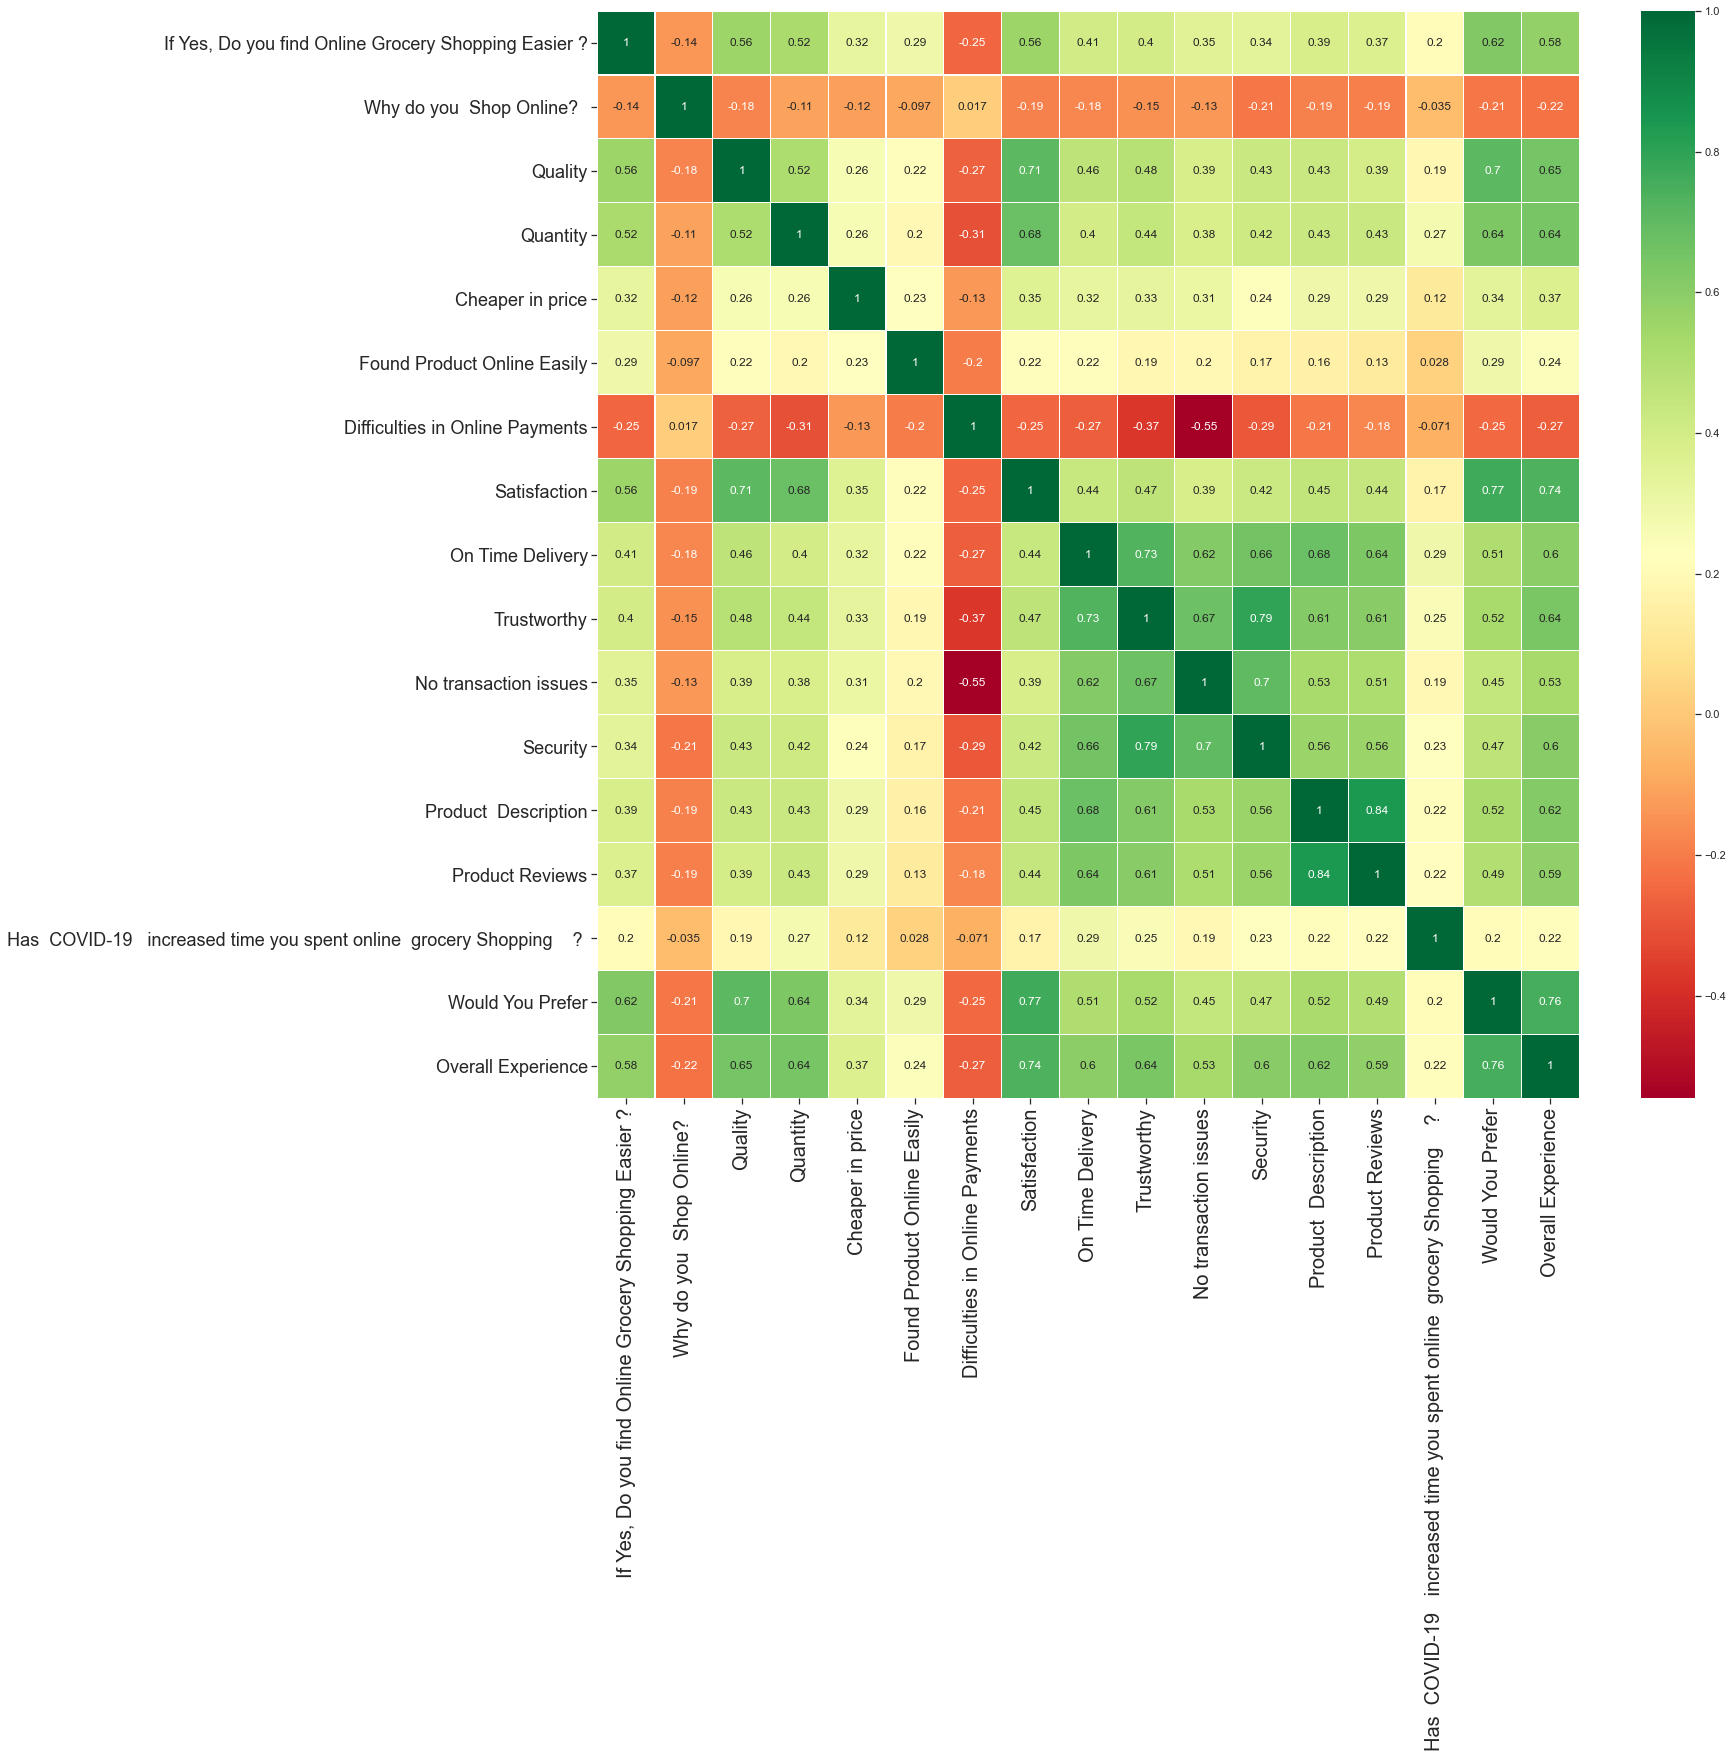

In [290]:
cols=['If Yes, Do you find Online Grocery Shopping Easier ?',
         'Why do you  Shop Online?  ','Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?',
      'Would You Prefer',
       'Overall Experience']

g = sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
g.set_xticklabels(g.get_ymajorticklabels(), fontsize = 20)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18)
fig=plt.gcf()
fig.set_size_inches(22,20)
plt.show()

## Conversion Using One Hot Encoding

In [291]:
one_hot_data = pd.get_dummies(data[['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity', 
       'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience']])

In [292]:
one_hot_data

,"If Yes, Do you find Online Grocery Shopping Easier ?",Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,Would You Prefer,Overall Experience,How often do you shop online in last six month?_2 times a week,How often do you shop online in last six month?_Everyday,How often do you shop online in last six month?_Monthly,How often do you shop online in last six month?_Weekly
0,1,1,1,1,1,0,1,5,5,5,5,5,4,1,1,5,0,1,0,0
1,1,1,1,1,1,0,0,1,2,2,2,2,2,1,1,1,0,1,0,0
2,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,5,0,1,0,0
3,1,1,1,1,1,1,1,5,5,5,5,5,5,1,1,5,0,1,0,0
4,1,0,1,1,1,0,1,2,2,1,2,2,1,1,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,0,0,0,0,1,0,1,1,1,1,3,2,1,0,1,0,0,0,1
366,1,1,1,1,1,0,1,5,5,4,5,3,3,1,1,4,0,0,0,1
367,1,1,1,1,1,0,1,4,4,5,5,5,4,1,1,4,0,0,0,1
368,0,0,0,0,0,1,0,3,1,1,1,1,1,1,0,1,0,0,0,1


In [293]:
one_hot_data = pd.get_dummies(data[['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity',
        'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience']],drop_first=True)

In [294]:
one_hot_data

,"If Yes, Do you find Online Grocery Shopping Easier ?",Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,Would You Prefer,Overall Experience,How often do you shop online in last six month?_Everyday,How often do you shop online in last six month?_Monthly,How often do you shop online in last six month?_Weekly
0,1,1,1,1,1,0,1,5,5,5,5,5,4,1,1,5,1,0,0
1,1,1,1,1,1,0,0,1,2,2,2,2,2,1,1,1,1,0,0
2,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,5,1,0,0
3,1,1,1,1,1,1,1,5,5,5,5,5,5,1,1,5,1,0,0
4,1,0,1,1,1,0,1,2,2,1,2,2,1,1,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,0,0,0,0,1,0,1,1,1,1,3,2,1,0,1,0,0,1
366,1,1,1,1,1,0,1,5,5,4,5,3,3,1,1,4,0,0,1
367,1,1,1,1,1,0,1,4,4,5,5,5,4,1,1,4,0,0,1
368,0,0,0,0,0,1,0,3,1,1,1,1,1,1,0,1,0,0,1


In [295]:
one_hot_data.columns

Index(['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality',
       'Quantity', 'Cheaper in price', 'Found Product Online Easily',
       'Difficulties in Online Payments', 'Satisfaction', 'On Time Delivery',
       'Trustworthy', 'No transaction issues', 'Security',
       'Product  Description', 'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'Would You Prefer', 'Overall Experience',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly'],
      dtype='object')

# Algorithm

## Prediction based on target variable as 'Satisfaction'

## 1) Decision Tree


### Plotting a variables graphs with satisfaction

<ipython-input-296-1beb6a79e8da>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-296-1beb6a79e8da>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-296-1beb6a79e8da>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will

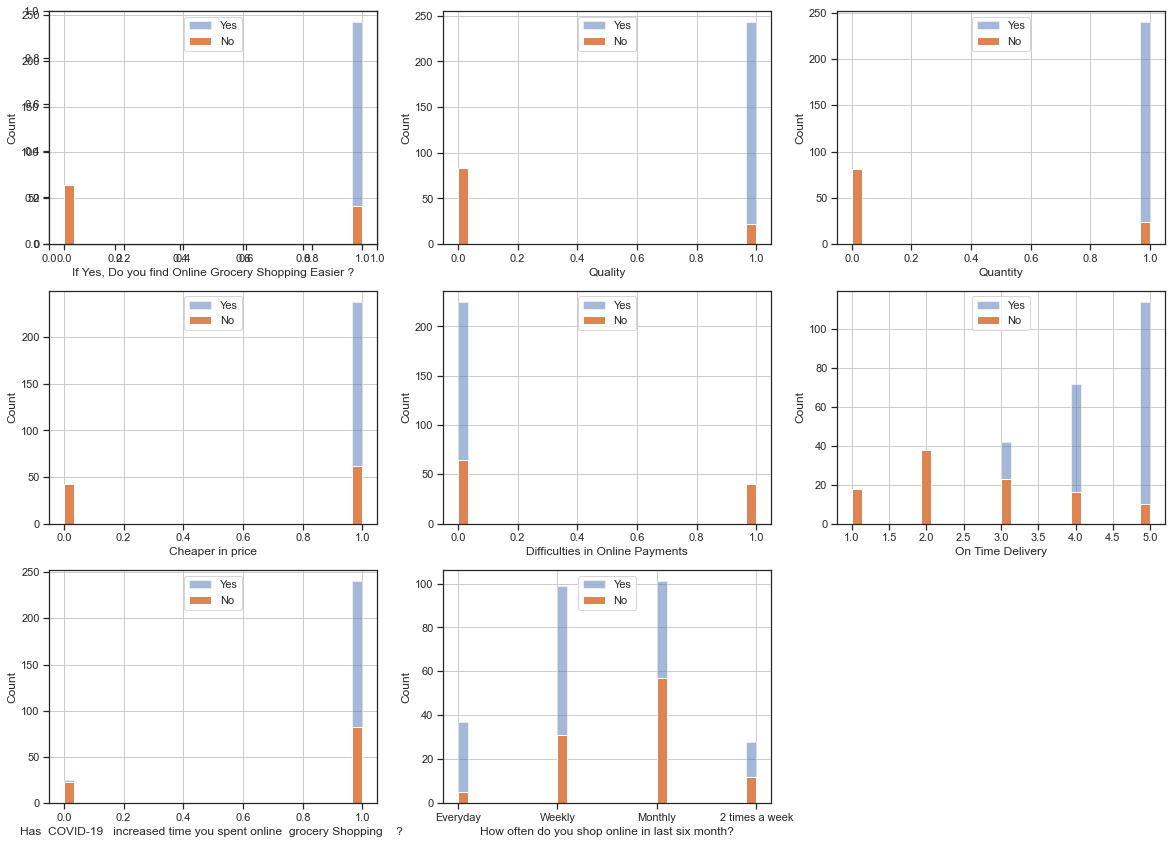

In [296]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality','Quantity', 'Cheaper in price',
               'Difficulties in Online Payments','On Time Delivery', 'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
               'How often do you shop online in last six month?','Overall Experience',]
    if colName in features:
        
        pos = data[data['Satisfaction'] == 1][colName]
        neg = data[data['Satisfaction'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=12)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 1, bins=30, label='No')
        ax.legend(loc=9)
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [297]:
train, test = train_test_split(one_hot_data, test_size =0.25,random_state=10)

In [298]:
train.shape

(277, 19)

In [299]:
test.shape

(93, 19)

In [300]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [301]:
features = ['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity', 'Cheaper in price',
            'Difficulties in Online Payments','On Time Delivery',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly','Overall Experience'] 

In [302]:
X_train = train[features]
y_train = train['Satisfaction']

X_test = test[features]
y_test = test['Satisfaction']

In [303]:
tree1 = c1.fit(X_train, y_train)

In [304]:
y_pred_t1 = c1.predict(X_train)

In [305]:
y_pred1 = c1.predict(X_test)

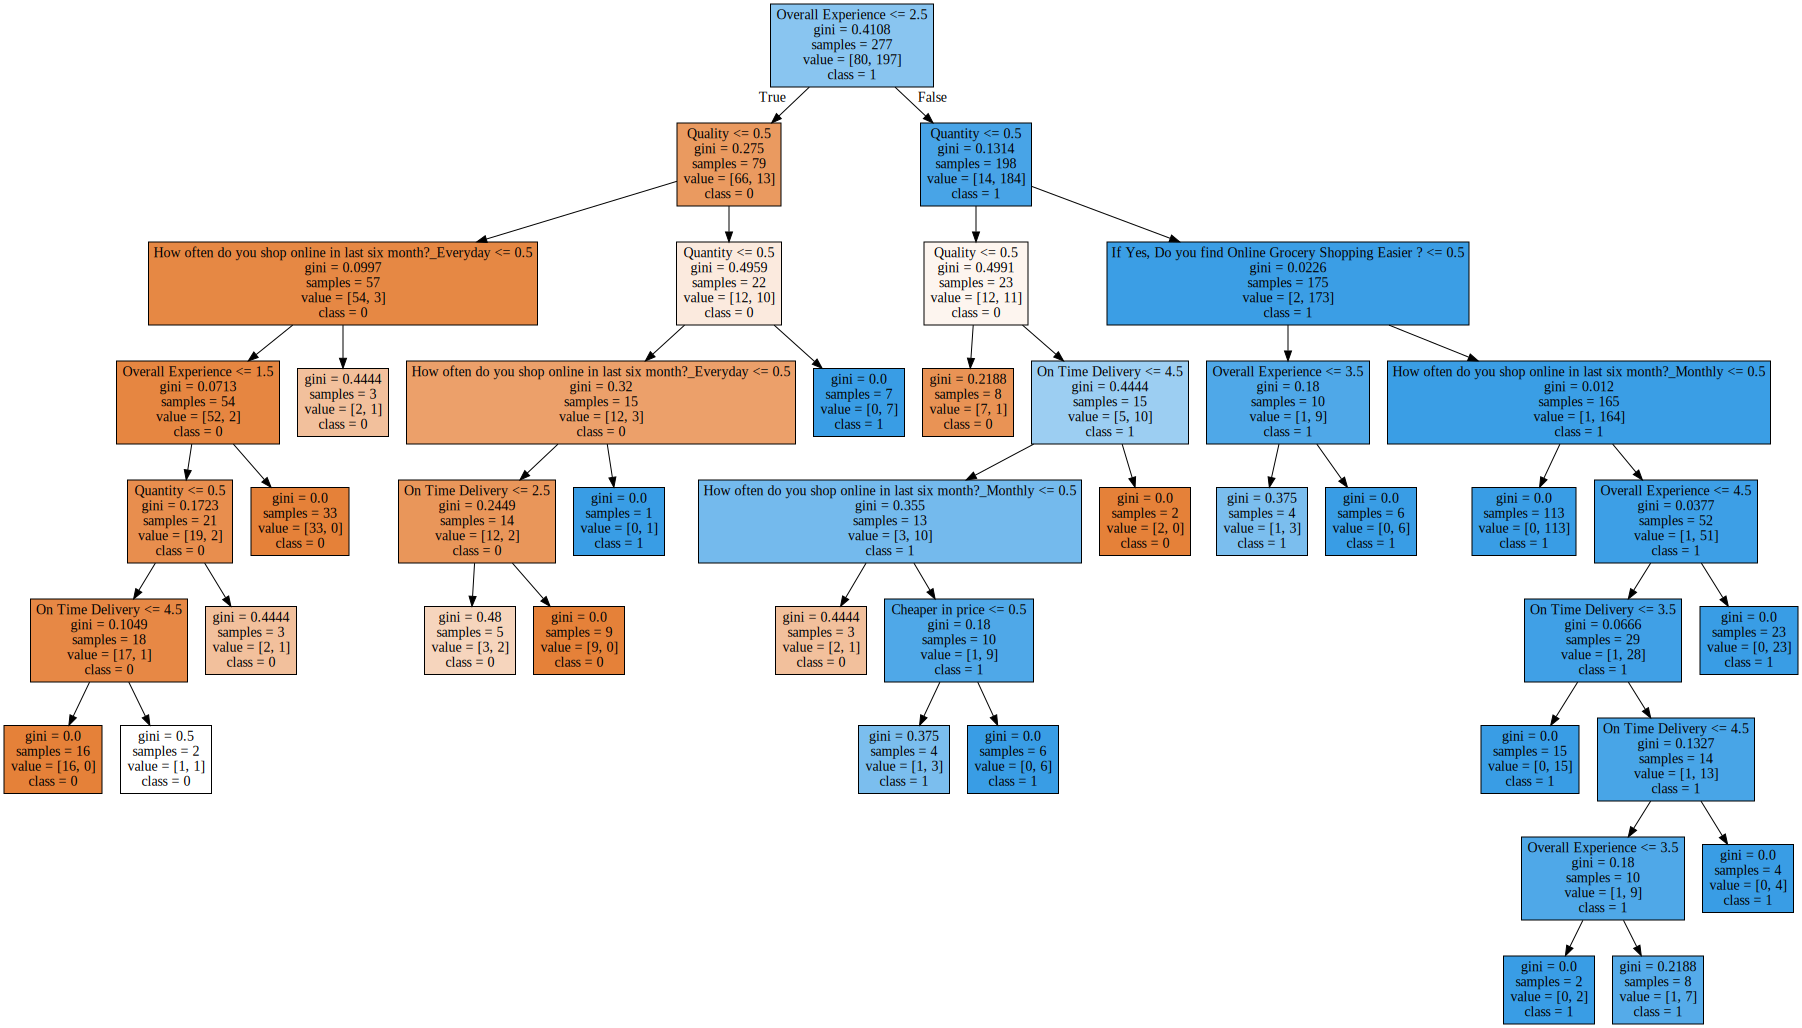

In [306]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [307]:
sat_train_score_1 = accuracy_score(y_train, y_pred_t1)*100

In [308]:
sat_test_score_1 = accuracy_score(y_test, y_pred1)*100
sat_test_score_1

89.24731182795699

In [309]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.90      0.96      0.93        68

    accuracy                           0.89        93
   macro avg       0.88      0.84      0.86        93
weighted avg       0.89      0.89      0.89        93



In [310]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[18,  7],
       [ 3, 65]], dtype=int64)

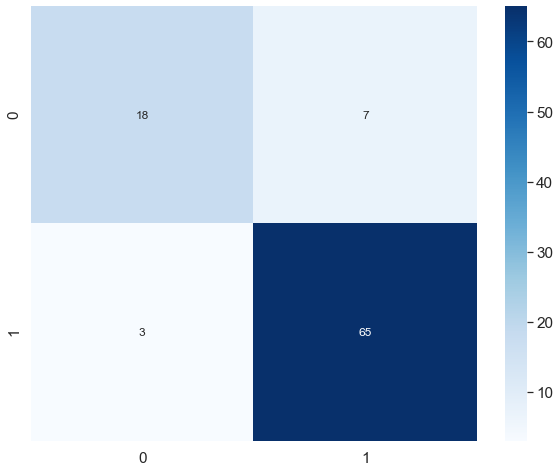

In [311]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 12}, fmt='g') # font size
plt.show()

In [312]:
model1 = tree1.predict_proba(X_train)


In [313]:
model1_test = tree1.predict_proba(X_test)


In [314]:
!pip install scikit-plot

<Figure size 504x504 with 0 Axes>

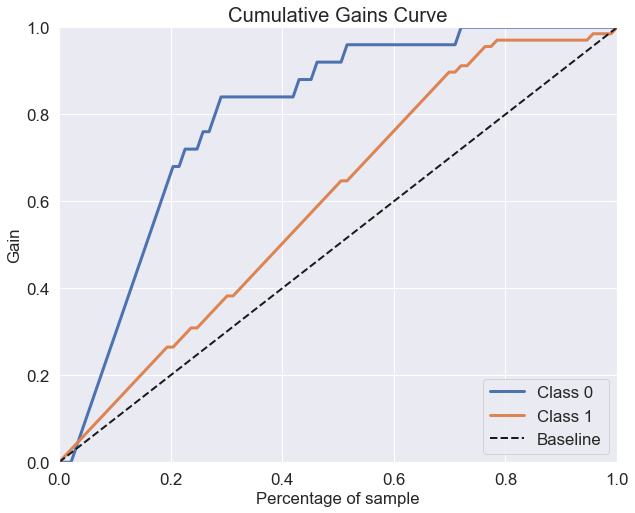

In [315]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model1_test)
plt.show()

# 2) Random Forest

In [316]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [317]:
rf1_model_pred = rf1.predict(X_test)

In [318]:
rf1_model_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1], dtype=int64)

In [319]:
sat_test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
sat_test_score_rf

89.24731182795699

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.90      0.96      0.93        68

    accuracy                           0.89        93
   macro avg       0.88      0.84      0.86        93
weighted avg       0.89      0.89      0.89        93



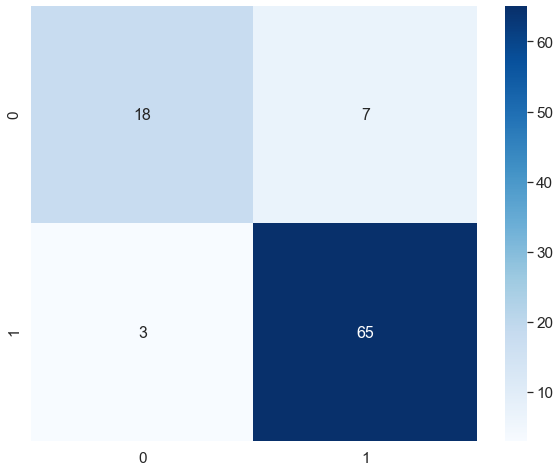

In [320]:
rd = print(classification_report(y_test, rf1_model_pred))
rf_cm = confusion_matrix(y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

# 3) Support Vector Machine

In [321]:
from sklearn import svm

In [322]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [323]:
model_svm = svmf.fit(X_train, y_train)

In [324]:
pred_svm = model_svm.predict(X_test)

In [325]:
sat_test_score_svm = accuracy_score(y_test, pred_svm)*100
sat_test_score_svm

90.32258064516128

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.92      0.96      0.94        68

    accuracy                           0.90        93
   macro avg       0.89      0.86      0.87        93
weighted avg       0.90      0.90      0.90        93



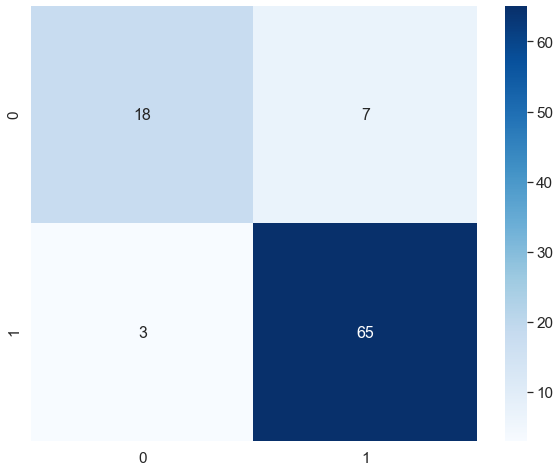

In [326]:
svm = print(classification_report(y_test, pred_svm))
svm_cm = confusion_matrix(y_test, pred_svm)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

# Plotting accuracy graph of all algo

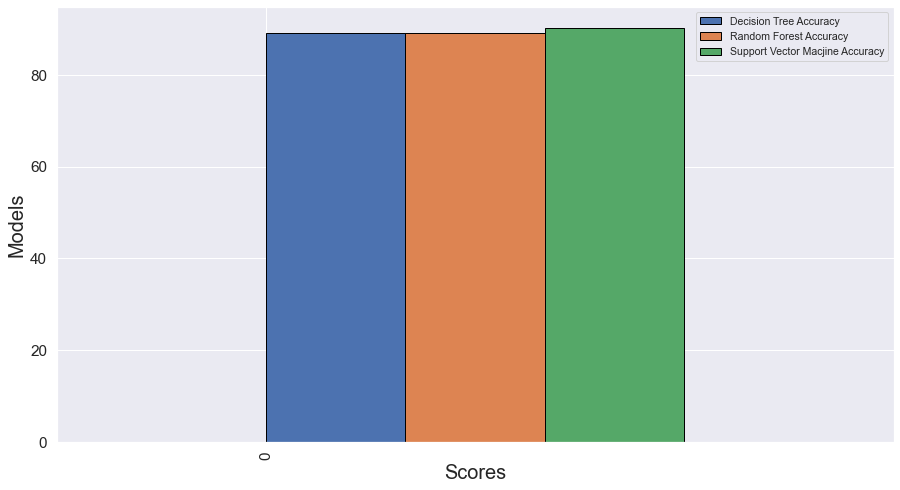

In [327]:
modelacc = pd.DataFrame({"Decision Tree Accuracy ": [sat_test_score_1],
                               "Random Forest Accuracy": [sat_test_score_rf], 
                         "Support Vector Macjine Accuracy": [sat_test_score_svm]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);

# Prediction based on target variable as 'would you prefer'

# Plotting a variables graphs

<ipython-input-328-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-328-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-328-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will

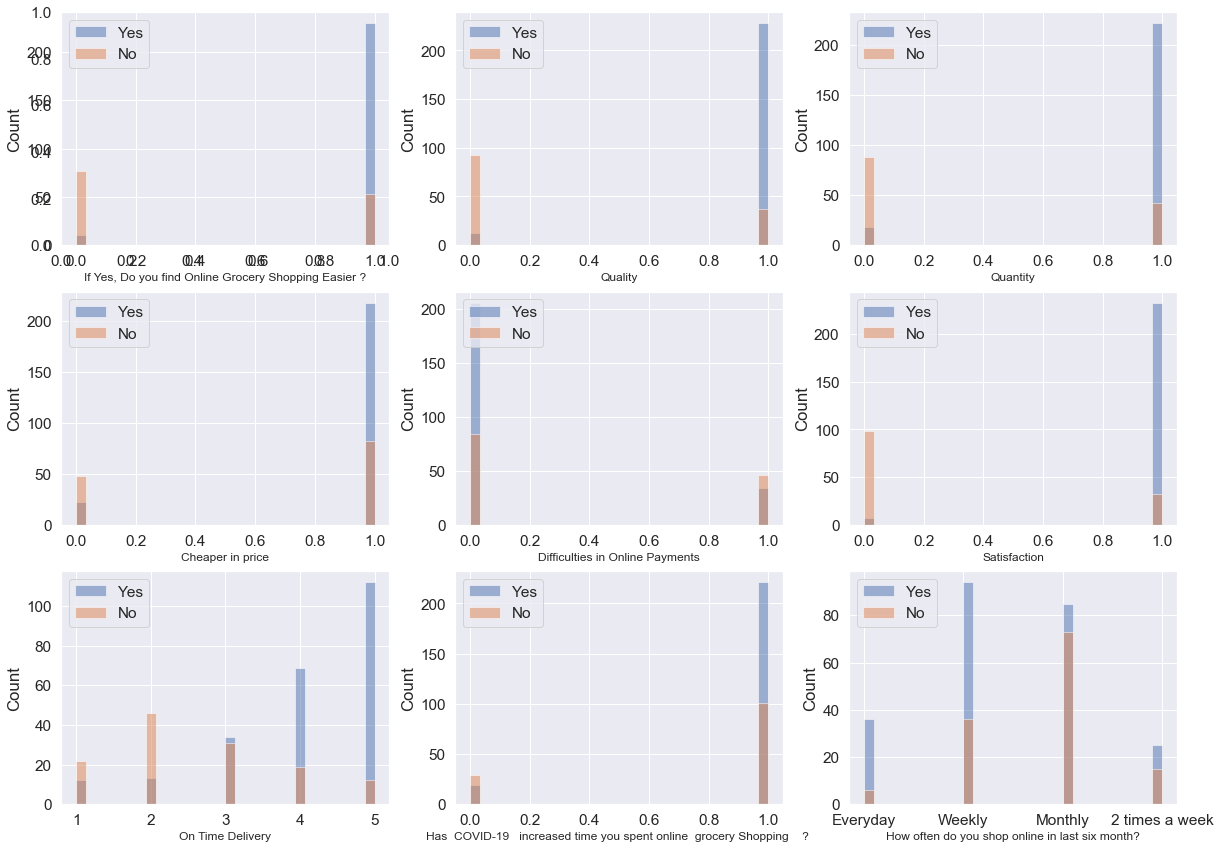

In [328]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality','Quantity', 'Cheaper in price',
               'Difficulties in Online Payments','On Time Delivery', 'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
               'How often do you shop online in last six month?','Satisfaction','Overall Experience']
    if colName in features:
        
        pos = data[data['Would You Prefer'] == 1][colName]
        neg = data[data['Would You Prefer'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=12)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='No')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# 1) Decision Tree

In [329]:
c2 = DecisionTreeClassifier(min_samples_split=10 )

In [330]:
features = ['Quality', 'Quantity', 'Cheaper in price', 'Satisfaction',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ','Overall Experience',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly'] 

In [331]:
X_train = train[features]
y_train = train['Would You Prefer']

X_test = test[features]
y_test = test['Would You Prefer']

In [332]:
tree1 = c2.fit(X_train, y_train)

In [333]:
y_pred_t1 = c2.predict(X_train)

In [334]:
y_pred1 = c2.predict(X_test)

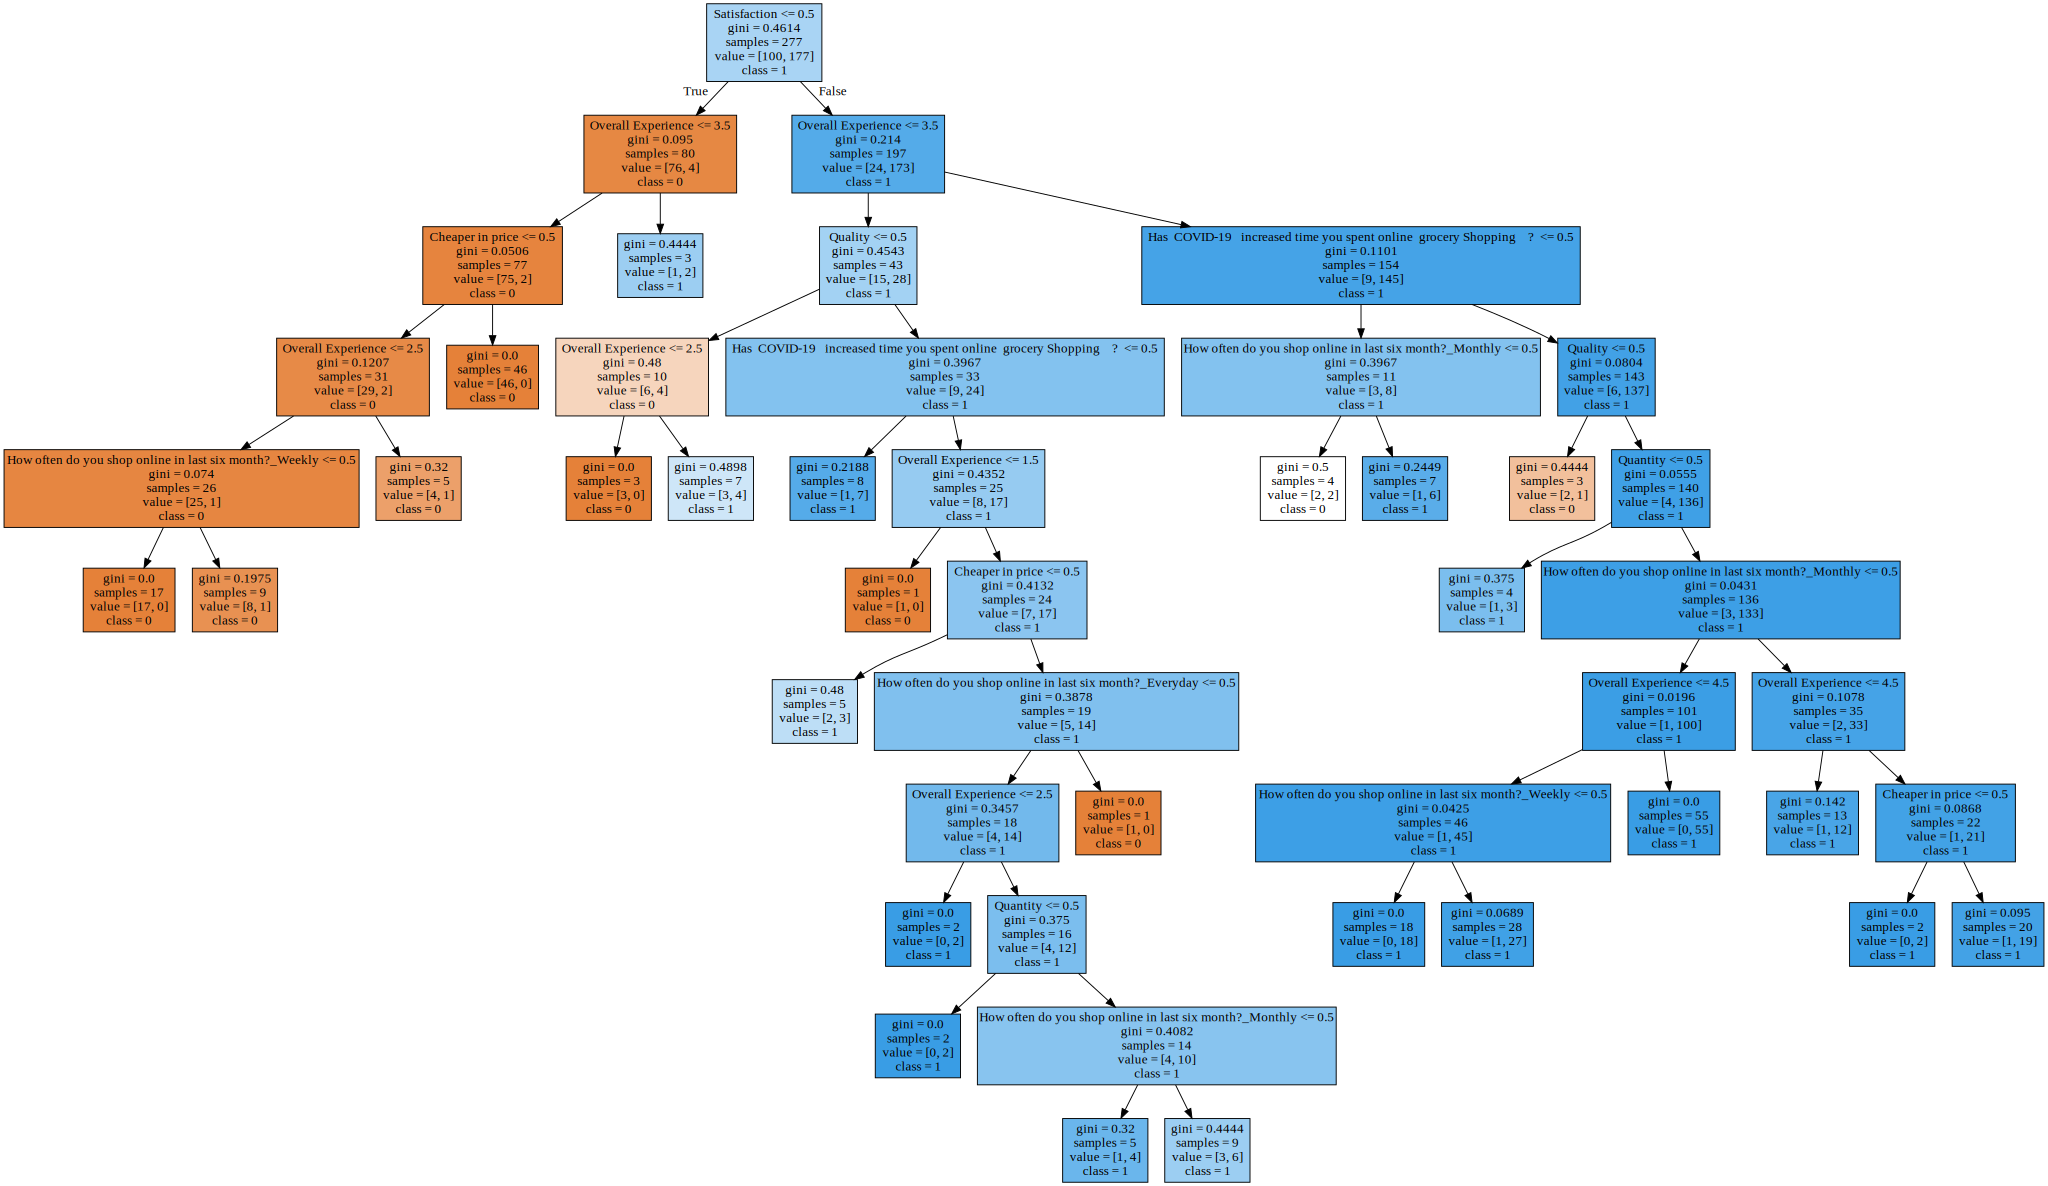

In [335]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [336]:
wyp_train_score_1 = accuracy_score(y_train, y_pred_t1)*100


In [337]:
wyp_test_score_1 = accuracy_score(y_test, y_pred1)*100
wyp_test_score_1

87.09677419354838

In [338]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.89      0.92      0.91        63

    accuracy                           0.87        93
   macro avg       0.86      0.84      0.85        93
weighted avg       0.87      0.87      0.87        93



In [339]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[23,  7],
       [ 5, 58]], dtype=int64)

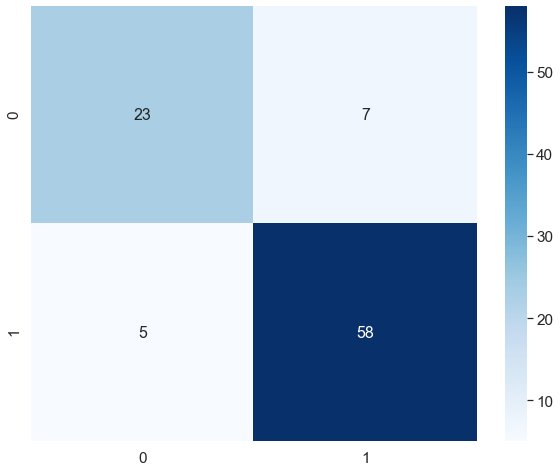

In [340]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g')
plt.show()

In [341]:
model2 = tree1.predict_proba(X_train)


In [342]:
model2_test = tree1.predict_proba(X_test)


<Figure size 504x504 with 0 Axes>

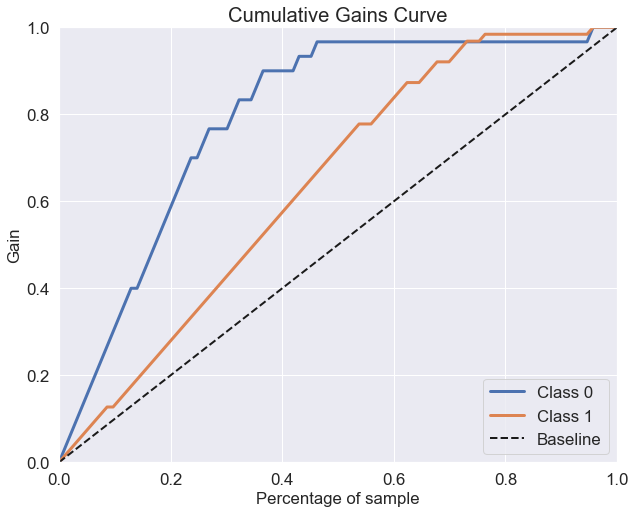

In [343]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model2_test)
plt.show()

# 2) Random Forest

In [376]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [345]:
rf1_model_pred_1 = rf1.predict(X_test)

In [346]:
wyp_test_score_rf = accuracy_score(y_test, rf1_model_pred_1)*100
wyp_test_score_rf

91.39784946236558

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.91      0.97      0.94        63

    accuracy                           0.91        93
   macro avg       0.92      0.88      0.90        93
weighted avg       0.91      0.91      0.91        93



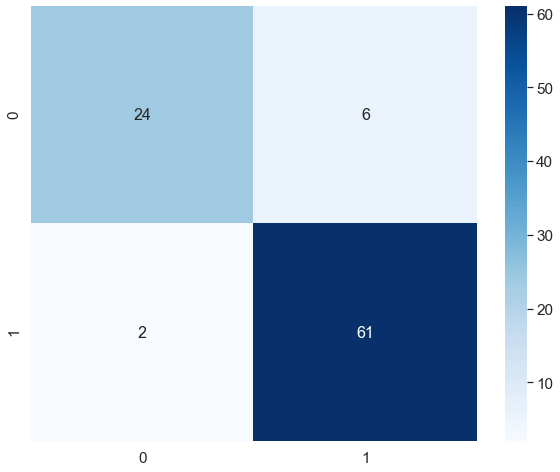

In [347]:
print(classification_report(y_test, rf1_model_pred_1))
rf_cm = confusion_matrix(y_test, rf1_model_pred_1)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

# 3) Support Vector Machine

In [348]:
from sklearn import svm

In [349]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3,random_state=42 )

In [350]:
model_svm = svmf.fit(X_train, y_train)

In [351]:
pred_svm = model_svm.predict(X_test)

In [352]:
wyp_sat_test_score_svm = accuracy_score(y_test, pred_svm)*100
wyp_sat_test_score_svm

86.02150537634408

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.90      0.89      0.90        63

    accuracy                           0.86        93
   macro avg       0.84      0.84      0.84        93
weighted avg       0.86      0.86      0.86        93



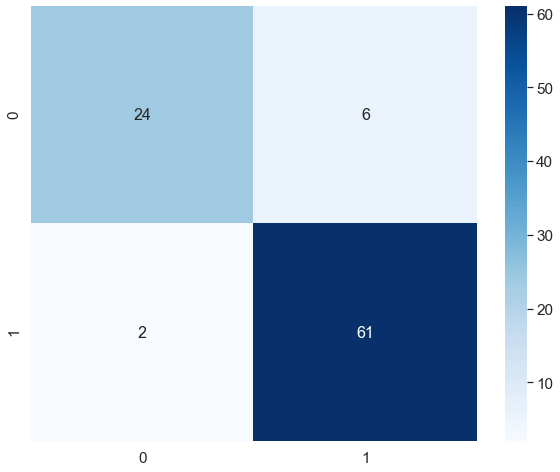

In [353]:
svm = print(classification_report(y_test, pred_svm))
svm_cm = confusion_matrix(y_test, pred_svm)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

# Plotting accuracy graph of tried algo

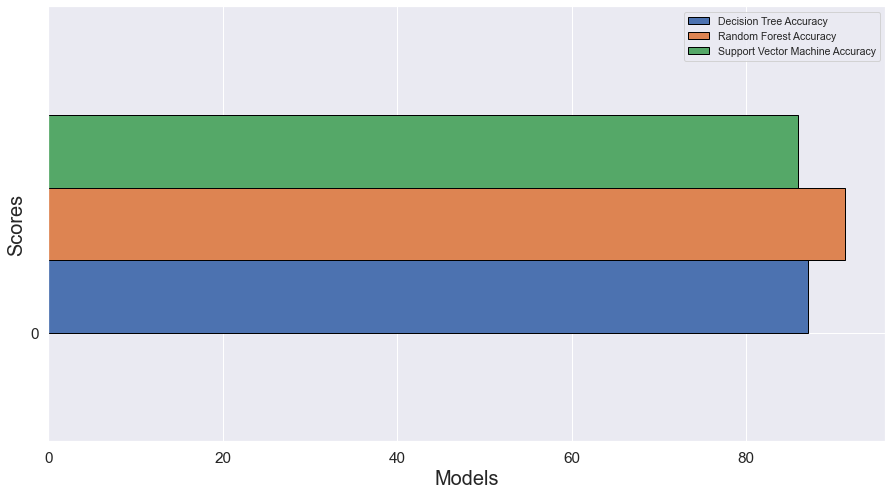

In [354]:
modelacc1 = pd.DataFrame({"Decision Tree Accuracy ": [wyp_test_score_1],
                               "Random Forest Accuracy": [wyp_test_score_rf],
                          "Support Vector Machine Accuracy":[wyp_sat_test_score_svm]})
modelacc1.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

# Plotting AUC-ROC

In [355]:
fpr1, tpr1, threshold1 = roc_curve(y_train, model1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_train, model2[:,1])
roc_auc2 = auc(fpr2, tpr2)

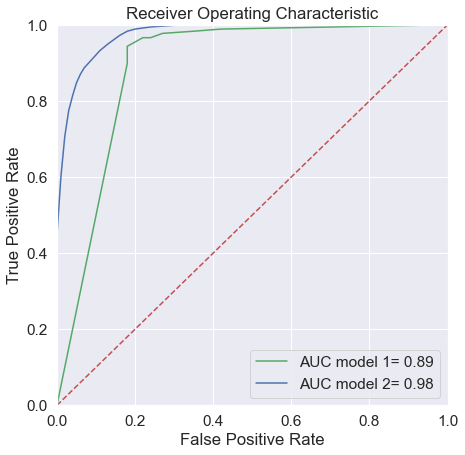

In [356]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [357]:
fpr1, tpr1, threshold1 = roc_curve(y_test, model1_test[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, model2_test[:,1])
roc_auc2 = auc(fpr2, tpr2)

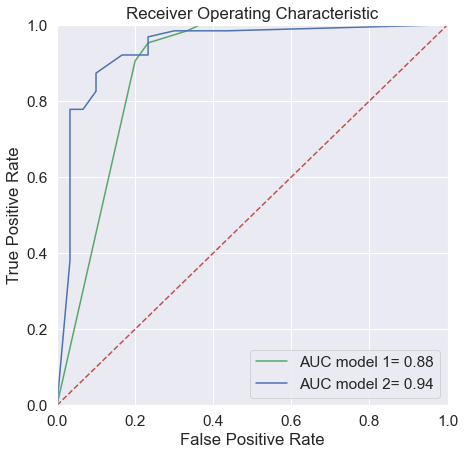

In [358]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Accuracy of both the prediction based on Random forest

Text(0.5, 1.0, 'Prediction of  Variables baesd on Random Forest')

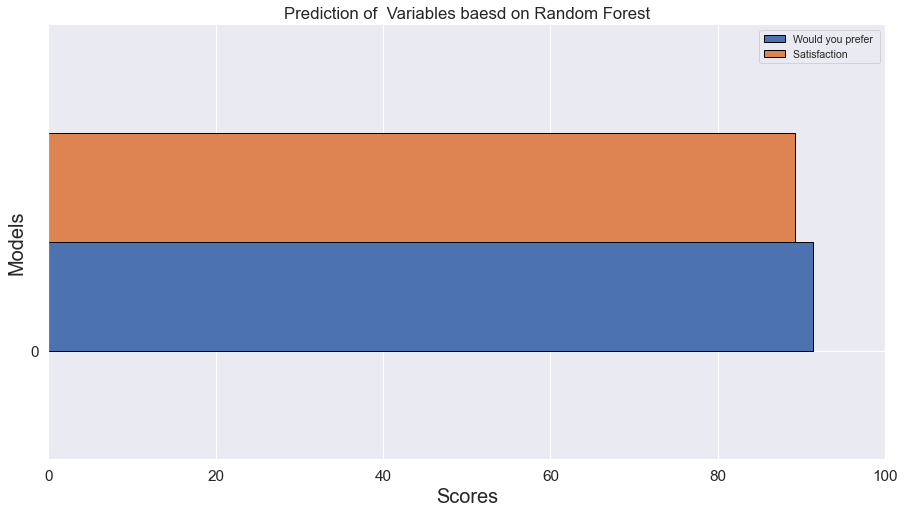

In [359]:
modelacc2 = pd.DataFrame({"Would you prefer ":[wyp_test_score_rf],
                          "Satisfaction ": [sat_test_score_rf]})
modelacc2.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlim(0,100)
plt.ylabel('Models', fontsize=20)
plt.xlabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);
plt.title('Prediction of  Variables baesd on Random Forest')

# Testing the Model with with new dataset

In [360]:
new_data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\new_data.csv")

In [361]:
new_data

,Timestamp,Have you shopped Online in last six month?,"If Yes, Do you find Online Grocery Shopping Easier ?",Do you found Variety of product online?,Do you get Discounts and offers online?,Do you find online Grocery shopping convenient?,Do you found hidden cost for any of the product ?,Is shopping grocery online is available for 24/7?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,...,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month ?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/05/16 7:14:21 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,5,4,5,5,Yes,Everyday,Yes,5
1,2021/05/16 7:19:28 pm GMT+5:30,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,...,4,4,4,4,4,4,Yes,Weekly,Yes,5
2,2021/05/16 7:20:36 pm GMT+5:30,Yes,No,No,No,No,Yes,Yes,No,Yes,...,5,3,1,3,2,2,Yes,Monthly,No,2
3,2021/05/16 7:21:47 pm GMT+5:30,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,...,3,3,3,3,4,4,Yes,Monthly,Yes,4
4,2021/05/16 7:22:50 pm GMT+5:30,Yes,Yes,No,No,Yes,No,Yes,Yes,No,...,3,3,4,4,1,1,Yes,Monthly,No,2
5,2021/05/16 7:23:32 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,5,5,5,5,5,Yes,Monthly,Yes,5
6,2021/05/16 7:24:22 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,5,4,4,5,4,Yes,Weekly,Yes,4
7,2021/05/16 7:37:37 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,5,5,5,5,Yes,Weekly,Yes,4
8,2021/05/16 7:47:26 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,4,5,5,5,Yes,2 times a week,Yes,4
9,2021/05/16 8:14:03 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,3,2,2,3,3,2,Yes,Monthly,Yes,4


# RENAMING THE COLUMNS NAME

In [362]:
new_data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality','Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity','Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price', 'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily','Do you find any difficulties in online payment ?':'Difficulties in Online Payments','Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience','Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [363]:
new_data

,Timestamp,Have you shopped Online in last six month?,"If Yes, Do you find Online Grocery Shopping Easier ?",Do you found Variety of product online?,Do you get Discounts and offers online?,Do you find online Grocery shopping convenient?,Do you found hidden cost for any of the product ?,Is shopping grocery online is available for 24/7?,Quality,Quantity,...,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month ?,Would You Prefer,Overall Experience
0,2021/05/16 7:14:21 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,5,4,5,5,Yes,Everyday,Yes,5
1,2021/05/16 7:19:28 pm GMT+5:30,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,...,4,4,4,4,4,4,Yes,Weekly,Yes,5
2,2021/05/16 7:20:36 pm GMT+5:30,Yes,No,No,No,No,Yes,Yes,No,Yes,...,5,3,1,3,2,2,Yes,Monthly,No,2
3,2021/05/16 7:21:47 pm GMT+5:30,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,...,3,3,3,3,4,4,Yes,Monthly,Yes,4
4,2021/05/16 7:22:50 pm GMT+5:30,Yes,Yes,No,No,Yes,No,Yes,Yes,No,...,3,3,4,4,1,1,Yes,Monthly,No,2
5,2021/05/16 7:23:32 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,5,5,5,5,5,Yes,Monthly,Yes,5
6,2021/05/16 7:24:22 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,5,4,4,5,4,Yes,Weekly,Yes,4
7,2021/05/16 7:37:37 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,5,5,5,5,Yes,Weekly,Yes,4
8,2021/05/16 7:47:26 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,5,4,4,5,5,5,Yes,2 times a week,Yes,4
9,2021/05/16 8:14:03 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,3,2,2,3,3,2,Yes,Monthly,Yes,4


In [364]:
new_data.columns

Index(['Timestamp', 'Have you  shopped Online in last six month?',
       'If Yes, Do you find Online Grocery Shopping Easier  ?',
       'Do you found Variety of product online?',
       'Do you get Discounts and offers online?',
       'Do you find online Grocery  shopping convenient?',
       'Do you found hidden cost for any of the  product ?',
       'Is shopping grocery online is available for 24/7?', 'Quality',
       'Quantity', 'Cheaper in price', 'Found Product Online Easily',
       'Difficulties in Online Payments', 'Satisfaction', 'On Time Delivery',
       'Trustworthy', 'No transaction issues', 'Security',
       'Product  Description', 'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month ?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

# Dropping The Columns

In [365]:
new_data=new_data.drop(['Do you found Variety of product online?',
       'Do you get Discounts and offers online?',
       'Do you find online Grocery  shopping convenient?',
       'Do you found hidden cost for any of the  product ?',
       'Is shopping grocery online is available for 24/7?'],axis=1)

In [366]:
new_data

,Timestamp,Have you shopped Online in last six month?,"If Yes, Do you find Online Grocery Shopping Easier ?",Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month ?,Would You Prefer,Overall Experience
0,2021/05/16 7:14:21 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,5,4,5,4,5,5,Yes,Everyday,Yes,5
1,2021/05/16 7:19:28 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,4,4,4,4,4,4,Yes,Weekly,Yes,5
2,2021/05/16 7:20:36 pm GMT+5:30,Yes,No,No,Yes,No,Yes,Yes,No,5,3,1,3,2,2,Yes,Monthly,No,2
3,2021/05/16 7:21:47 pm GMT+5:30,Yes,Yes,Yes,Yes,No,Yes,No,Yes,3,3,3,3,4,4,Yes,Monthly,Yes,4
4,2021/05/16 7:22:50 pm GMT+5:30,Yes,Yes,Yes,No,No,No,No,No,3,3,4,4,1,1,Yes,Monthly,No,2
5,2021/05/16 7:23:32 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Monthly,Yes,5
6,2021/05/16 7:24:22 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,5,5,4,4,5,4,Yes,Weekly,Yes,4
7,2021/05/16 7:37:37 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,5,4,5,5,5,5,Yes,Weekly,Yes,4
8,2021/05/16 7:47:26 pm GMT+5:30,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,5,4,4,5,5,5,Yes,2 times a week,Yes,4
9,2021/05/16 8:14:03 pm GMT+5:30,Yes,Yes,No,Yes,Yes,No,No,Yes,3,2,2,3,3,2,Yes,Monthly,Yes,4


In [367]:
new_data.columns

Index(['Timestamp', 'Have you  shopped Online in last six month?',
       'If Yes, Do you find Online Grocery Shopping Easier  ?', 'Quality',
       'Quantity', 'Cheaper in price', 'Found Product Online Easily',
       'Difficulties in Online Payments', 'Satisfaction', 'On Time Delivery',
       'Trustworthy', 'No transaction issues', 'Security',
       'Product  Description', 'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month ?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

# Converting The Data to Integer